# Ex3 - Getting and Knowing your Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user). 

### Step 3. Assign it to a variable called users and use the 'user_id' as index

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|', index_col = 'user_id')

### Step 4. See the first 25 entries

In [3]:
users.head(25)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


### Step 5. See the last 10 entries

In [4]:
users.tail(10)

,age,gender,occupation,zip_code
user_id,,,,
934,61,M,engineer,22902
935,42,M,doctor,66221
936,24,M,other,32789
937,48,M,educator,98072
938,38,F,technician,55038
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209


### Step 6. What is the number of observations in the dataset?

In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


### Step 7. What is the number of columns in the dataset?

In [5]:
users.shape[1]

4

### Step 8. Print the name of all the columns.

In [6]:
[print(col) for col in users.columns]

age
gender
occupation
zip_code


[None, None, None, None]

### Step 9. How is the dataset indexed?

In [8]:
(users.index == range(1,944)).sum()

943

### Step 10. What is the data type of each column?

In [9]:
users.dtypes

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

### Step 11. Print only the occupation column

In [10]:
users['occupation']

user_id
1         technician
2              other
3             writer
4         technician
5              other
6          executive
7      administrator
8      administrator
9            student
10            lawyer
11             other
12             other
13          educator
14         scientist
15          educator
16     entertainment
17        programmer
18             other
19         librarian
20         homemaker
21            writer
22            writer
23            artist
24            artist
25          engineer
26          engineer
27         librarian
28            writer
29        programmer
30           student
           ...      
914            other
915    entertainment
916         engineer
917          student
918        scientist
919            other
920           artist
921          student
922    administrator
923          student
924            other
925         salesman
926    entertainment
927       programmer
928          student
929        scientist
930  

### Step 12. How many different occupations are in this dataset?

In [11]:
users['occupation'].nunique(), users['occupation'].unique()

(21, array(['technician', 'other', 'writer', 'executive', 'administrator',
        'student', 'lawyer', 'educator', 'scientist', 'entertainment',
        'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
        'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
       dtype=object))

### Step 13. What is the most frequent occupation?

In [8]:
users['occupation'].value_counts()[0:1]

student    196
Name: occupation, dtype: int64

### Step 14. Summarize the DataFrame.

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Data columns (total 4 columns):
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(1), object(3)
memory usage: 36.8+ KB


### Step 15. Summarize all the columns

In [14]:
users.describe(include='all')

,age,gender,occupation,zip_code
count,943.000000,943,943,943
unique,NaN,2,21,795
top,NaN,M,student,55414
freq,NaN,670,196,9
mean,34.051962,NaN,NaN,NaN
std,12.192740,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN


### Step 16. Summarize only the occupation column

In [15]:
users['occupation'].describe()

count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object

### Step 17. What is the mean age of users?

In [9]:
np.round(users['age'].mean(),2), users['age'].median()

(34.05, 31.0)

### Step 18. What is the age with least occurrence?

In [17]:
# Solution 1
users['age'].value_counts().iloc[-7:]

69    2
62    2
11    1
10    1
73    1
66    1
7     1
Name: age, dtype: int64

In [18]:
# Solution 2
tab = users['age'].value_counts()
age_l_occ = tab[tab==tab.min()].index
# users[users['age'].values <= 15 ]
age_l_occ

Int64Index([11, 10, 73, 66, 7], dtype='int64')

# BONUS

### What is the repartition of the age for the different occupations ? Is this the same for men and women ?

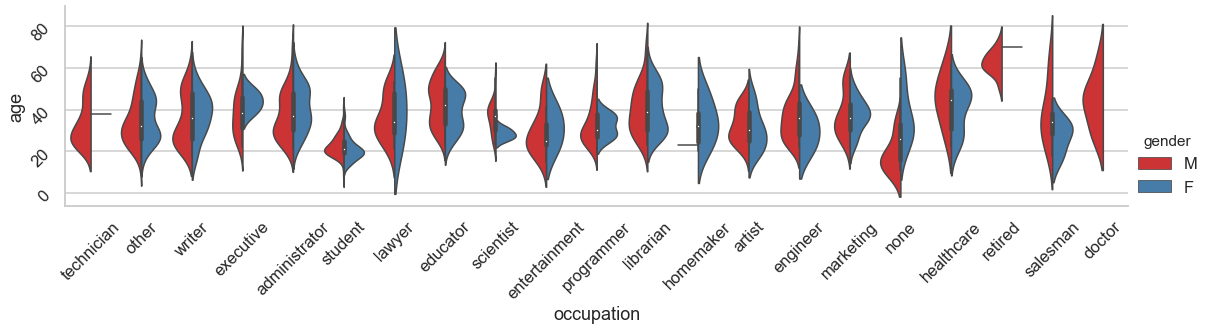

In [19]:
sns.set(context='talk', style='whitegrid')
fg = sns.catplot(data = users, x='occupation', y='age', kind="violin", legend=True, legend_out=True, palette='Set1',
                height=4, aspect=4, hue='gender', split=True, dodge=True, linewidth=1.5)
fg.axes[0][0].tick_params(rotation=45)

### How many people are living in each department, attending that the two first number of the zip code correspond to a particular department ?

In [32]:
zip2_gen = users.groupby([users['zip_code'].str.slice(0,2), 'gender']).agg({'zip_code':'count'}).unstack()

In [36]:
zip2_gen = zip2_gen.reset_index()
zip2_gen.columns = ['__'.join(c).strip() for c in zip2_gen.columns.values]
zip2_gen

,zip_code__,zip_code__F,zip_code__M
0,00,1.0,1.0
1,01,1.0,19.0
2,02,7.0,17.0
3,03,2.0,4.0
4,04,1.0,1.0
5,05,NaN,6.0
6,06,5.0,12.0
7,07,3.0,4.0
8,08,2.0,9.0
9,09,NaN,1.0


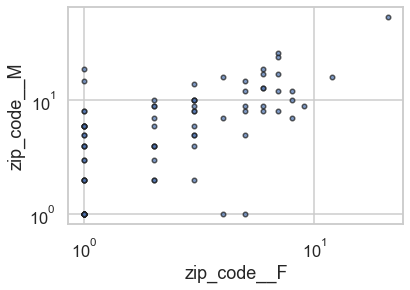

In [46]:
zip2_gen.plot.scatter(x='zip_code__F', y='zip_code__M', alpha=0.7, ec='k', c='b') #
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')